In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Week7_train.csv")
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[0:4000,1:]
print(X)

      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3995       0       0       0       0       0       0       0       0       0   
3996       0       0       0       0       0       0       0       0       0   
3997       0       0       0       0       0       0       0       0       0   
3998       0       0       0       0       0       0       0       0       0   
3999       0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel774  pixel775  

In [6]:
y = df.iloc[0:4000,0:1]
print(y)

      label
0         1
1         0
2         1
3         4
4         0
...     ...
3995      6
3996      7
3997      6
3998      6
3999      4

[4000 rows x 1 columns]


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.neighbors import VALID_METRICS

print(VALID_METRICS['brute'])

['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'haversine', 'jaccard', 'l1', 'l2', 'mahalanobis', 'manhattan', 'minkowski', 'nan_euclidean', 'precomputed', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']


In [8]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X,y)

c:\Users\Panchakoti Sravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [9]:
testing = pd.read_csv("week7_test.csv")

testing.shape
testing.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_test = testing.iloc[:,:]

In [11]:
# x_test = df.iloc[4000:4005,1:]
knn_pred = knn.predict(x_test)

label    7
Name: 6, dtype: int64

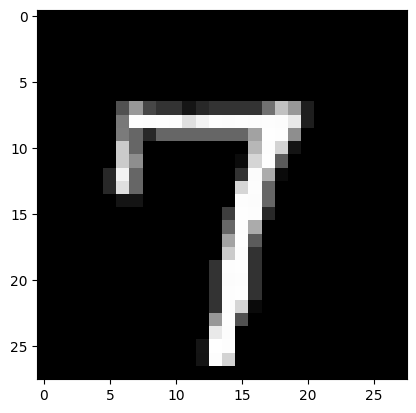

In [20]:
# val = int(input("Enter value"))
plt.imshow(df.iloc[6,1:].values.reshape(28,28),cmap='gray')
# knn_pred[3]
df.iloc[6,0:1]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Evaluate on the training set
y_train = y.values.ravel()
y_pred_train = knn.predict(X)
 
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[397   0   0   0   0   0   2   1   0   0]
 [  0 442   1   0   0   0   1   0   1   1]
 [  4  11 399   0   1   0   0  10   4   1]
 [  1   5   4 350   0   5   0   2   1   2]
 [  0   5   0   0 371   0   2   0   0  11]
 [  2   2   0   4   0 361   6   1   0   3]
 [  3   1   0   0   1   3 405   0   0   0]
 [  0   8   0   0   4   1   0 390   0   6]
 [  3  13   2  16   2   6   2   3 330   6]
 [  4   3   1   4  10   0   1  10   1 347]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       400
           1       0.90      0.99      0.94       446
           2       0.98      0.93      0.95       430
           3       0.94      0.95      0.94       370
           4       0.95      0.95      0.95       389
           5       0.96      0.95      0.96       379
           6       0.97      0.98      0.97       413
           7       0.94      0.95      0.94       409
           8       0.98      0.86      0.92       383
           9       0.92     